# What Markers to Include?

In this notebook, I'll try to identify what markers that make sense to include in our analysis. 
On all models (subset of the labelled data), we perform:
- We identify the the CA dimension that best separates high and low labeled markers (via CORG functionality 1, logistic regression)
- We identify the direction across all dims that best separates high and low labelled markers. (CORG functionality 2, multivariate logistic regression) 
- The CORG methodology might be problematic since we don't have a good span of data variables in high and low categories

In [122]:
# Standard library imports
import sys

# Third party imports
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns
import prince
from networkx.algorithms import bipartite
from netgraph import Graph
import community as community_louvain

# Local application imports
sys.path.insert(0, '../Utility files')
from corg import DiscoverDimension, BenchmarkDimension
from corg_pipeline import *

## CORG for assessing models

Link to Pedro's GitHub with the tutorial https://github.com/pedroramaciotti/CORG/blob/main/tutorial/CORG_quickstart.ipynb

### 1) Best CA dimensions

Outputs for CORG functionality 1. Model number 7
           twitter_name  label         0         1         2         3
132592  FortuneMagazine      1  1.467172 -0.001549 -0.589346  0.390673
44742         GQ_France      1 -0.347526 -0.165025 -0.065521 -0.906370
99749        HarvardBiz      1  1.985596  0.036226 -1.726256  0.420728
117685       InvestirFr      1  1.659050  0.047361  2.643568  0.286345
33653      Madamefigaro      1 -0.366321 -0.240760 -0.057245 -0.597808
label
1    7
0    2
Name: count, dtype: int64


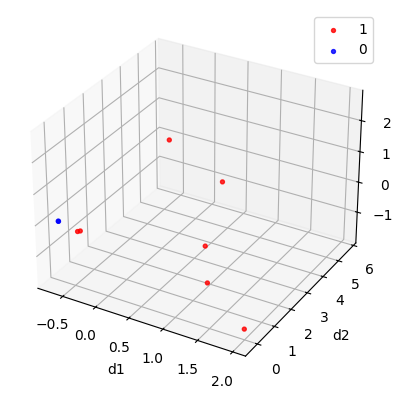

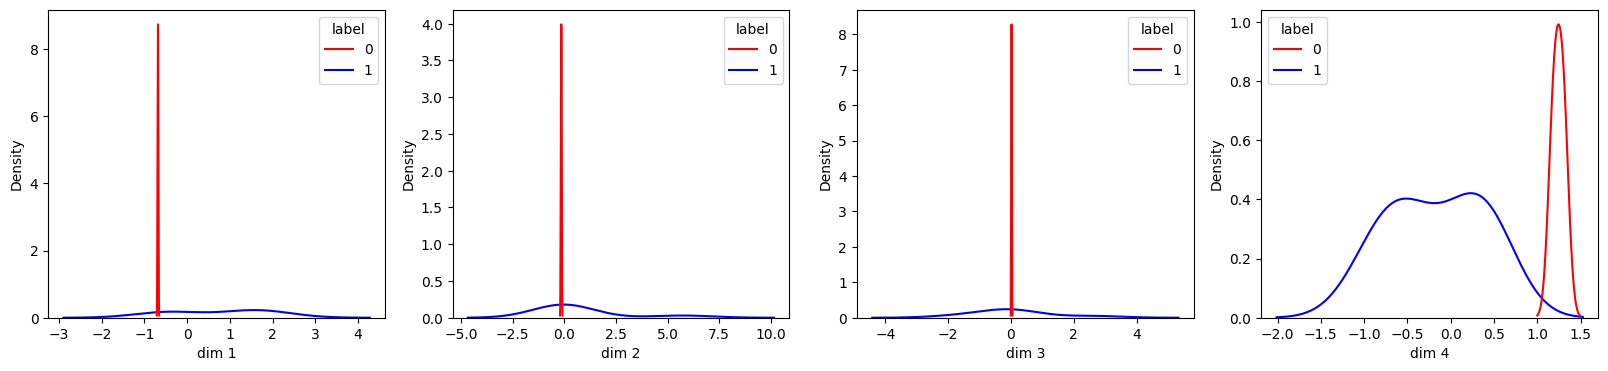

Dimension 0: Precision=0.778, Recall=1.000, F1-score=0.875
Dimension 1: Precision=0.778, Recall=1.000, F1-score=0.875
Dimension 2: Precision=0.778, Recall=1.000, F1-score=0.875
Dimension 3: Precision=0.778, Recall=1.000, F1-score=0.875


In [128]:
#CORG func 1 for model n. Input model number in order to run
m = CorgPipeline(7)
m.func1()

### 2) Spatial dimension across n CA dims

Outputs for CORG functionality 2. Model number 8
Decision boundary:
[-0.32020027694704073, -0.023579648033207955, 0.001234600709465701, -0.0009662100362646933, 6.9155573041828315]
Hyperplane Unit Normal:
[-0.9972876416888043, -0.0734405722665236, 0.003845255980756118, -0.003009333213668151]
Functionality 2 metrics for model number 8
Precision=1.000, Recall=1.000, F1-score=1.000, 


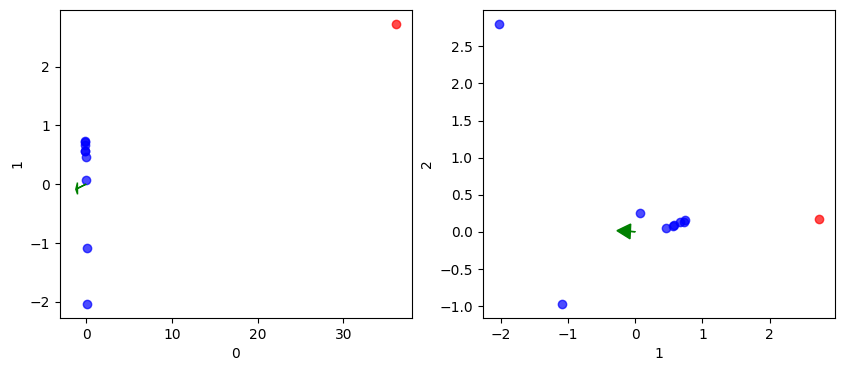

In [126]:
#CORG functionality 2 for model n. Input model number in order to run
m = CorgPipeline(8)
m.func2()

In [125]:
#Functinality 2 metrics for all models

importlib.reload(corg_pipeline)
for i in range(1, 9):  # range(1, 9) generates numbers from 1 to 8
    m = CorgPipeline(i)
    m.func2_metrics()

Functionality 2 metrics for model number 1
Precision=0.913, Recall=0.955, F1-score=0.933, 
Functionality 2 metrics for model number 2
Precision=0.900, Recall=0.947, F1-score=0.923, 
Functionality 2 metrics for model number 3
Precision=0.867, Recall=0.867, F1-score=0.867, 
Functionality 2 metrics for model number 4
Precision=1.000, Recall=0.923, F1-score=0.960, 
Functionality 2 metrics for model number 5
Precision=1.000, Recall=0.857, F1-score=0.923, 
Functionality 2 metrics for model number 6
Precision=1.000, Recall=0.667, F1-score=0.800, 
Functionality 2 metrics for model number 7
Precision=1.000, Recall=1.000, F1-score=1.000, 
Functionality 2 metrics for model number 8
Precision=1.000, Recall=1.000, F1-score=1.000, 
